In [55]:
import gcp.storage as storage

# Orders

In [1]:
%%sql --module orders_by_timeofday_slot
SELECT FIRST(timeofday_slot), COUNT(*) AS num_orders FROM [datalab-projects-1331:xjk_algo_comp.orders]
GROUP BY timeofday_slot
ORDER BY timeofday_slot

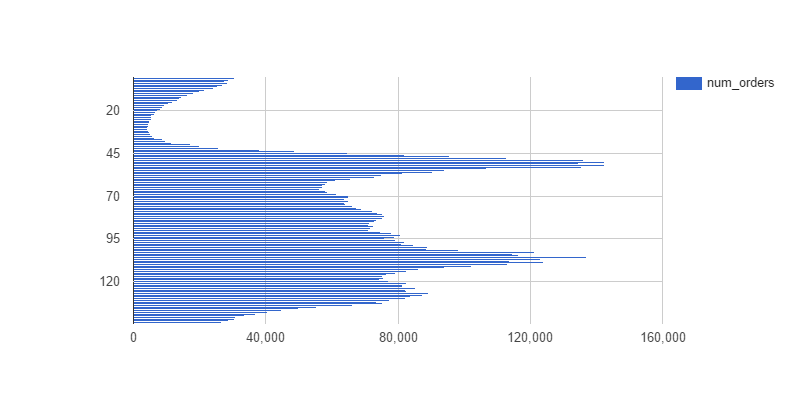

In [2]:
%%chart bars --data orders_by_timeofday_slot
height: 400
vAxis:
  direction: -1

# Gaps

In [3]:
%%sql --module gaps_by_timeofday_slot
SELECT timeofday_slot, gaps FROM [datalab-projects-1331:xjk_algo_comp.gaps]

In [ ]:
%%chart bars --data orders_by_timeofday_slot
height: 400
vAxis:
  direction: -1